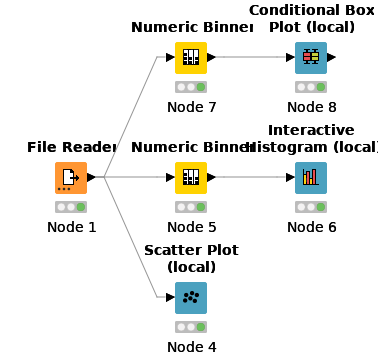

In [6]:
import findspark
findspark.init()
import pyspark
import pandas as pd
import knime
from pyspark import SparkConf, SparkContext, SQLContext
from pyspark.sql.functions import  avg

sc = SparkContext.getOrCreate()
SQLContext = SQLContext(sc)


df = SQLContext.read.load('file:///home/leandro/Desktop/Knime/weather.csv', format = 'com.databricks.spark.csv', header='true',inferschema ='true')

knime.executable_path = "c:/Users/glandrum/Desktop/KNIME_3.7/knime.exe"
workspace = "/home/leandro/knime-workspace"

workflow = "KNIME_Hands on"
knime.Workflow(workflow_path=workflow,workspace_path=workspace)


In [14]:
print(df.columns)

['number', 'air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am', 'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am', 'rain_accumulation_9am', 'rain_duration_9am', 'relative_humidity_9am', 'relative_humidity_3pm']


In [16]:
df.printSchema()

root
 |-- number: integer (nullable = true)
 |-- air_pressure_9am: double (nullable = true)
 |-- air_temp_9am: double (nullable = true)
 |-- avg_wind_direction_9am: double (nullable = true)
 |-- avg_wind_speed_9am: double (nullable = true)
 |-- max_wind_direction_9am: double (nullable = true)
 |-- max_wind_speed_9am: double (nullable = true)
 |-- rain_accumulation_9am: double (nullable = true)
 |-- rain_duration_9am: double (nullable = true)
 |-- relative_humidity_9am: double (nullable = true)
 |-- relative_humidity_3pm: double (nullable = true)



In [17]:
df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
number,1095,547.0,316.24357700987383,0,1094
air_pressure_9am,1092,918.8825513138094,3.184161180386833,907.9900000000024,929.3200000000012
air_temp_9am,1090,64.93300141287072,11.175514003175877,36.752000000000685,98.90599999999992
avg_wind_direction_9am,1091,142.2355107005759,69.13785928889189,15.500000000000046,343.4
avg_wind_speed_9am,1092,5.50828424225493,4.5528134655317185,0.69345139999974,23.554978199999763
max_wind_direction_9am,1092,148.95351796516923,67.23801294602953,28.89999999999991,312.19999999999993
max_wind_speed_9am,1091,7.019513529175272,5.598209170780958,1.1855782000000479,29.84077959999996
rain_accumulation_9am,1089,0.20307895225211126,1.5939521253574893,0.0,24.01999999999907
rain_duration_9am,1092,294.1080522756142,1598.0787786601481,0.0,17704.0


In [18]:
df.describe('air_pressure_9am').show()

+-------+-----------------+
|summary| air_pressure_9am|
+-------+-----------------+
|  count|             1092|
|   mean|918.8825513138094|
| stddev|3.184161180386833|
|    min|907.9900000000024|
|    max|929.3200000000012|
+-------+-----------------+



In [21]:
print(len(df.columns))
df.count()

11


1095

In [26]:
df.stat.corr("relative_humidity_9am","relative_humidity_3pm")

0.8830741909793918

In [3]:
df.describe('rain_accumulation_9am').show()  # 1089


+-------+---------------------+
|summary|rain_accumulation_9am|
+-------+---------------------+
|  count|                 1089|
|   mean|  0.20307895225211126|
| stddev|   1.5939521253574893|
|    min|                  0.0|
|    max|    24.01999999999907|
+-------+---------------------+



In [2]:
df.describe('air_temp_9am').show() 

+-------+------------------+
|summary|      air_temp_9am|
+-------+------------------+
|  count|              1090|
|   mean| 64.93300141287072|
| stddev|11.175514003175877|
|    min|36.752000000000685|
|    max| 98.90599999999992|
+-------+------------------+



In [3]:
removeAlldf = df.na.drop()

In [4]:
removeAlldf.describe('air_temp_9am').show() 

+-------+------------------+
|summary|      air_temp_9am|
+-------+------------------+
|  count|              1064|
|   mean| 65.02260949558733|
| stddev|11.168033449415704|
|    min|36.752000000000685|
|    max| 98.90599999999992|
+-------+------------------+



In [9]:
inputdf = df

In [10]:
for x in inputdf.columns:
    meanValue = removeAlldf.agg(avg(x)).first()[0]
    print(x, meanValue)
    inputdf = inputdf.na.fill(meanValue, [x])
    
    

number 545.0018796992481
air_pressure_9am 918.9031798641051
air_temp_9am 65.02260949558733
avg_wind_direction_9am 142.30675564934037
avg_wind_speed_9am 5.48579305071369
max_wind_direction_9am 148.48042413321315
max_wind_speed_9am 6.999713658875691
rain_accumulation_9am 0.18202347650615522
rain_duration_9am 266.3936973996037
relative_humidity_9am 34.07743985327709
relative_humidity_3pm 35.14838093290533


In [11]:
df.describe('air_temp_9am').show() 
inputdf.describe('air_temp_9am').show() 

+-------+------------------+
|summary|      air_temp_9am|
+-------+------------------+
|  count|              1090|
|   mean| 64.93300141287072|
| stddev|11.175514003175877|
|    min|36.752000000000685|
|    max| 98.90599999999992|
+-------+------------------+

+-------+------------------+
|summary|      air_temp_9am|
+-------+------------------+
|  count|              1095|
|   mean| 64.93341058219818|
| stddev| 11.14994819992023|
|    min|36.752000000000685|
|    max| 98.90599999999992|
+-------+------------------+

